## To Run or Not to Run 
In this tutorial, we will create a simple time series and use Python to demonstrate the difference between the standard variance and the long-run variance. This will help us understand why the concept of long-run variance is crucial for analyzing time-dependent data like EEG signals.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

# Set a random seed for reproducibility
np.random.seed(42)

# --- Create a simple white noise series (uncorrelated) ---
n = 1000  # Number of data points
white_noise = np.random.normal(0, 1, n)

# --- Create an autoregressive series (highly correlated) ---
# This mimics a time series with "memory."
# The underlying shock is also from a normal distribution with variance 1.
ar_series = np.zeros(n)
ar_series[0] = white_noise[0]  # Initialize with the first white noise value
for i in range(1, n):
    # Each value is 0.8 times the previous value, plus a new white noise shock.
    ar_series[i] = 0.8 * ar_series[i-1] + white_noise[i]

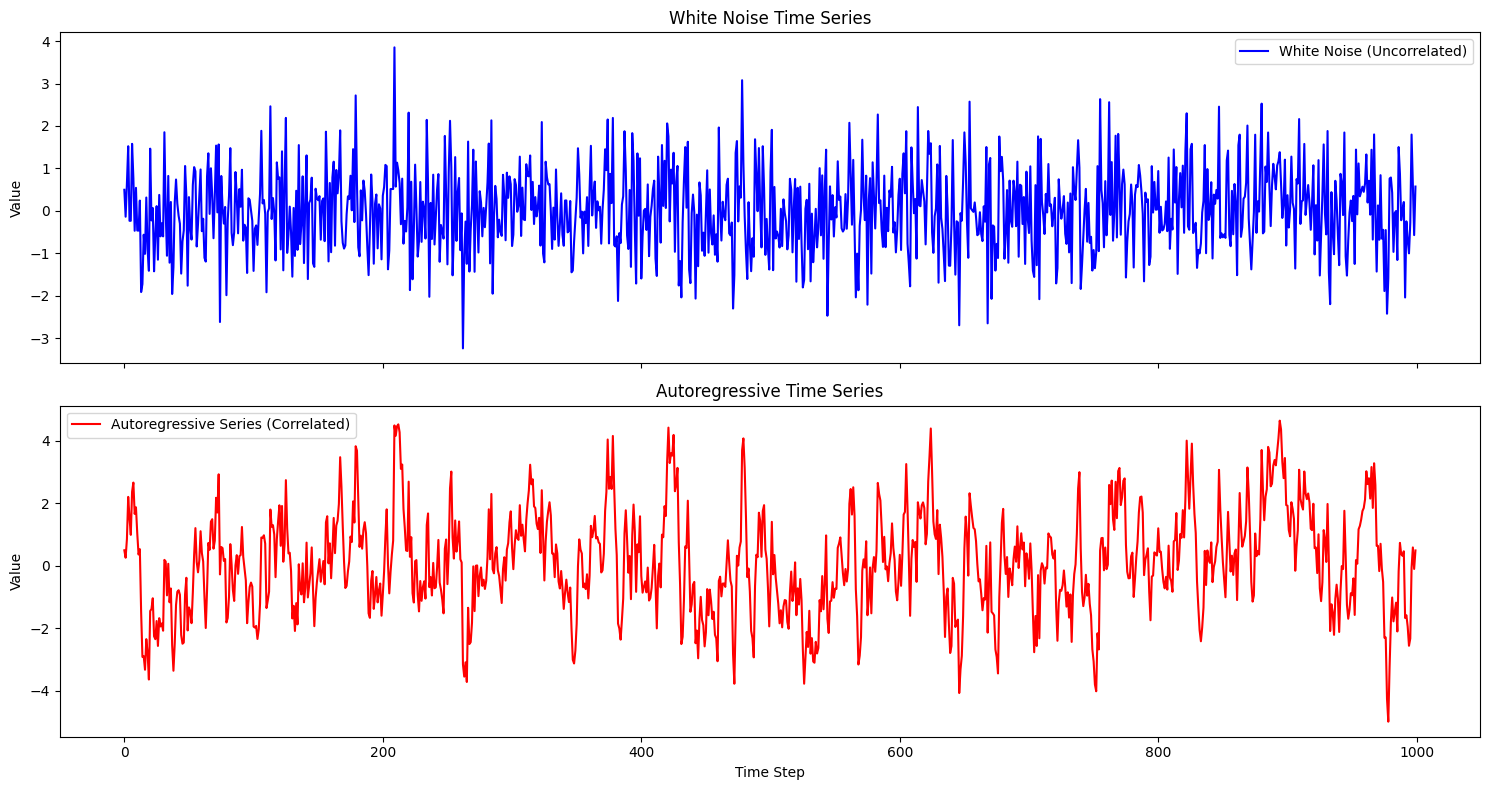

In [2]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

# Plot White Noise
axes[0].plot(white_noise, label='White Noise (Uncorrelated)', color='blue')
axes[0].set_title('White Noise Time Series')
axes[0].set_ylabel('Value')
axes[0].legend()

# Plot Autoregressive Series
axes[1].plot(ar_series, label='Autoregressive Series (Correlated)', color='red')
axes[1].set_title('Autoregressive Time Series')
axes[1].set_xlabel('Time Step')
axes[1].set_ylabel('Value')
axes[1].legend()

plt.tight_layout()
plt.show()

In [3]:
# Calculate the standard variance for both series
var_white_noise = np.var(white_noise)
var_ar_series = np.var(ar_series)

print(f"Standard Variance of White Noise: {var_white_noise:.4f}")
print(f"Standard Variance of Autoregressive Series: {var_ar_series:.4f}")

# The standard variance of the AR series is much higher because of the "memory."
# The values are not independent, so the total spread is larger than the spread of the shocks.

Standard Variance of White Noise: 0.9579
Standard Variance of Autoregressive Series: 2.6280


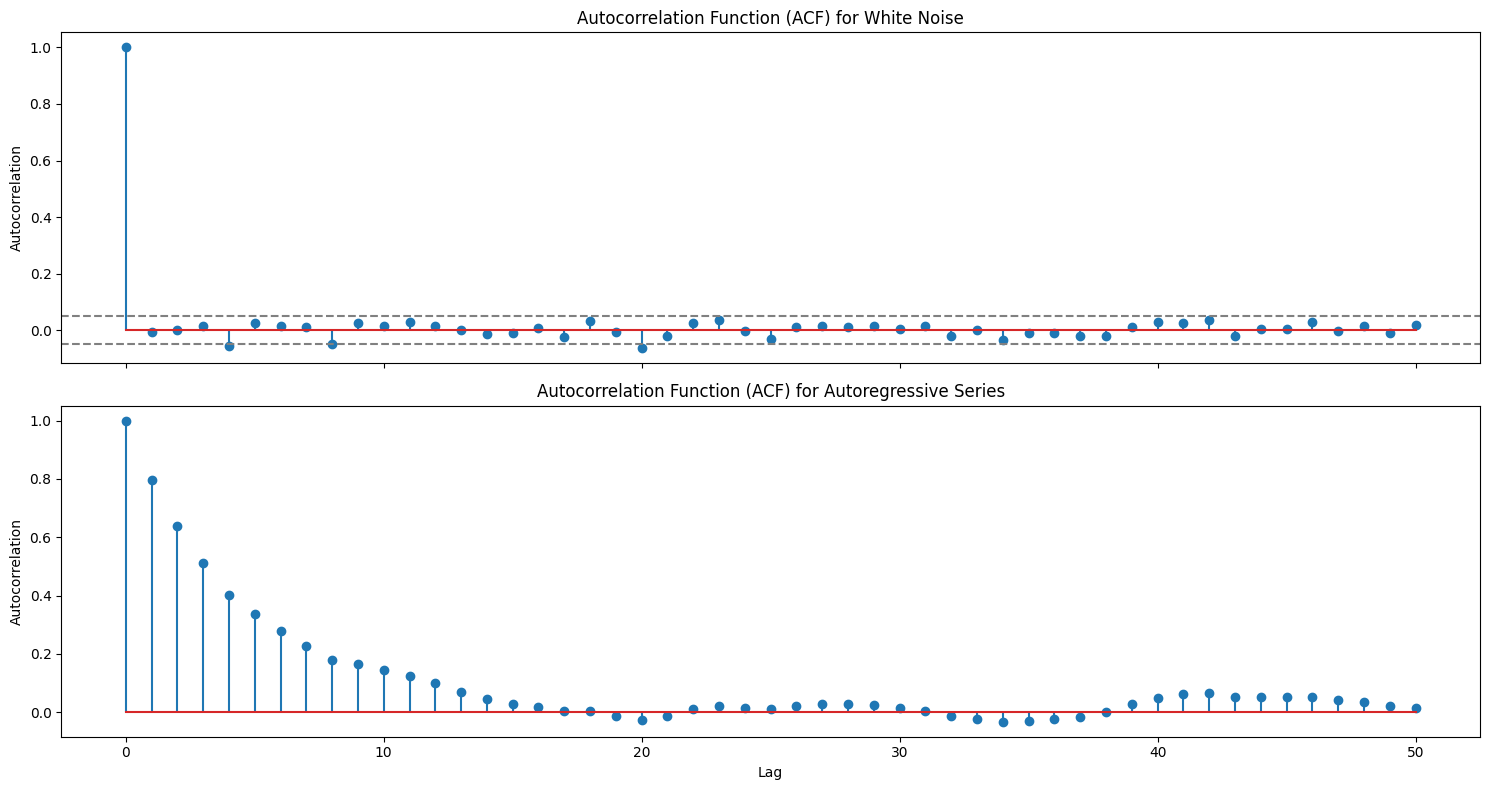

In [4]:
# Calculate and plot the Autocorrelation Function (ACF)
acf_white_noise = acf(white_noise, nlags=50)
acf_ar_series = acf(ar_series, nlags=50)

fig, axes = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

# Plot ACF for White Noise
# Removed the `use_line_collection=True` argument
axes[0].stem(acf_white_noise)
axes[0].set_title('Autocorrelation Function (ACF) for White Noise')
axes[0].set_ylabel('Autocorrelation')
axes[0].axhline(y=0.05, color='gray', linestyle='--')
axes[0].axhline(y=-0.05, color='gray', linestyle='--')

# Plot ACF for Autoregressive Series
# Removed the `use_line_collection=True` argument
axes[1].stem(acf_ar_series)
axes[1].set_title('Autocorrelation Function (ACF) for Autoregressive Series')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('Autocorrelation')

plt.tight_layout()
plt.show()

In [5]:
# A simplified calculation of Long-Run Variance
# Summing up the autocorrelations (ignoring lag 0 and the first few lags for stability)
sum_of_autocorrelations = np.sum(acf_ar_series[1:])

# Long-run variance is approximately the standard variance scaled by the sum of autocorrelations.
# The `np.var(ar_series)` is the aurocovariance at lag 0.
lr_var_ar_series_approx = np.var(ar_series) + 2 * np.sum(acf_ar_series[1:] * np.var(ar_series))

print(f"Standard Variance of AR Series: {np.var(ar_series):.4f}")
print(f"Approximate Long-Run Variance of AR Series: {lr_var_ar_series_approx:.4f}")

# For the white noise, since all autocorrelations are close to zero,
# the long-run variance is essentially the same as the standard variance.
print("\n--- For White Noise Series ---")
print(f"Standard Variance: {np.var(white_noise):.4f}")
print(f"Approximate Long-Run Variance: {np.var(white_noise):.4f}")

Standard Variance of AR Series: 2.6280
Approximate Long-Run Variance of AR Series: 26.6537

--- For White Noise Series ---
Standard Variance: 0.9579
Approximate Long-Run Variance: 0.9579
